<a href="https://colab.research.google.com/github/Keshav1506/Ted-Talks-views-Prediction-Model/blob/main/Ted_Talk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TED TALKS Views Prediction**
****
TED is devoted to spreading powerful ideas on just about any topic. Founded in 1984 by Richard Salman as a nonprofit organization
that aimed at bringing experts from the fields of Technology, Entertainment, and Design
together, TED Conferences have gone on to become the Mecca of ideas from virtually all
walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000
talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore,
Jimmy Wales, Shahrukh Khan, and Bill Gates.

##**Objective**
****
The main objective is to build a predictive model, which could help in predicting the views of
the videos uploaded on the TEDx website.

##**Importing Neccessary Libraries**

In [1]:
# Importing Neccessary Packages.

import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt


##**Data Gathering and Discovery**
***

In [2]:
# Mounting the Google Drive to access data.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# The variable Data_path contains the path of dataset stored in drive.
Data_path = "/content/drive/MyDrive/Colab Notebooks/Almabetter/Capstone Projects/Capstone Project 2 - Ted Talk Views Prediction/"

# Importing TED Talks Data File.
Ted_talks = pd.read_csv(Data_path + "data_ted_talks.csv")

In [4]:
Ted_talks.head(3)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."


In [5]:
Ted_talks.describe().T

,count,mean,std,min,25%,50%,75%,max
talk_id,4005.0,1.243254e+04,1.744758e+04,1.0,1252.0,2333.0,23777.0,62794.0
views,4005.0,2.148006e+06,3.451226e+06,0.0,882069.0,1375508.0,2133110.0,65051954.0
comments,3350.0,1.619970e+02,2.688389e+02,0.0,38.0,89.0,188.0,6449.0
duration,4005.0,7.240112e+02,3.617755e+02,60.0,393.0,738.0,974.0,3922.0


In [6]:
Ted_talks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [7]:
Ted_talks.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

##**EDA on TED Talks Dataset**

**Views** :-

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


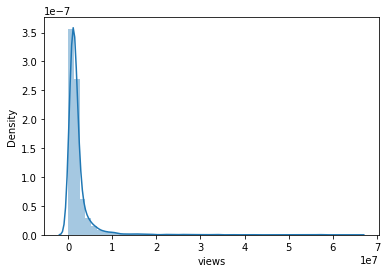

In [9]:
sns.distplot(Ted_talks["views"])

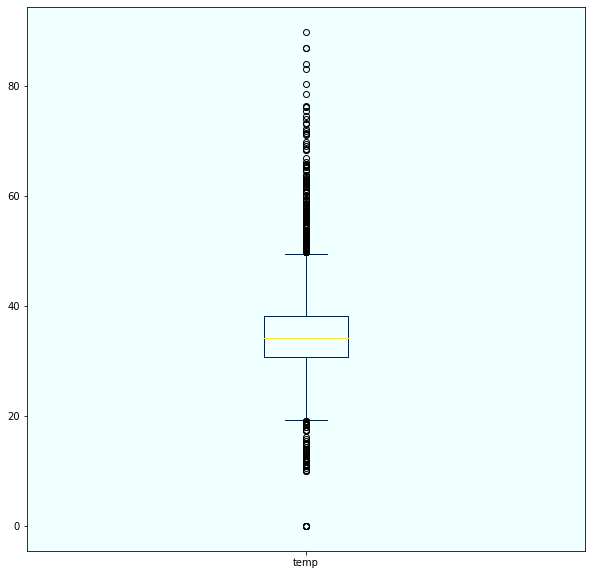

In [ ]:
# Making a temporary column with Fourth root of 'views' column such that we can visualize it using a box plot.
Ted_talks["temp"] = np.power(Ted_talks["views"], 1/4)

# Plotting the Box plot on "temp" column.
Ted_talks.plot(y = "temp", kind = "box", figsize = (10,10), colormap = "cividis").patch.set_facecolor('#f0ffff')

# Dropping the 'temp' column since its irrelevant 
Ted_talks.drop(axis = 1, labels = ["temp"], inplace = True)

Dropping Rows with 0 Views

In [ ]:
Ted_talks[Ted_talks.views <= 1000]

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,temp
2813,17850,Por qué necesitamos proteger el alta mar,Enric Sala,{0: 'Enric Sala'},{0: ['marine ecologist']},{0: 'Dr. Enric Sala is a former university pro...,0,2018-04-26,2018-06-06,TED en Español en NYC,es,"['en', 'es']",NaN,772,"['environment', 'economics', 'biosphere', 'nat...","{17733: ""Let's turn the high seas into the wor...",https://www.ted.com/talks/enric_sala_por_que_n...,Estamos pescando más rápido que la capacidad d...,If you randomly jumped in any point of the sea...,0.0
3056,29009,Cómo usar el arte de la fotografía para restau...,Alejandro Chaskielberg,{0: 'Alejandro Chaskielberg'},{0: ['photographer']},"{0: 'Alejandro Chaskielberg is a photographer,...",0,2018-11-05,2018-11-29,TEDxRiodelaPlata,es,"['en', 'es', 'pt']",NaN,862,"['art', 'photography', 'community', 'history',...",{2854: 'How your pictures can help reclaim los...,https://www.ted.com/talks/alejandro_chaskielbe...,¿Qué le puede suceder a la memoria cuando la e...,"Recently, my daughter and I decided to give aw...",0.0
3068,29688,Por qué deberíamos comer más bichos,Renata di Tullio,{0: 'Renata di Tullio'},{0: ['técnica agropecuaria y agroalimentaria']},{0: 'Rena es Técnica Agropecuaria y Agroalimen...,0,2018-11-05,2018-12-07,TEDxRiodelaPlata,es,"['en', 'es', 'nl']",NaN,417,"['global issues', 'science', 'insects', 'food'...","{2427: 'The case for fish farming', 1018: 'Why...",https://www.ted.com/talks/renata_di_tullio_por...,"Have you ever considered crickets, houseflies ...",I'm passionate about insects for two reasons. ...,0.0
3520,43755,Can dogs sniff out malaria?,James Logan,{0: 'James Logan'},"{0: ['biologist', 'medical entomologist']}",{0: 'Professor James Logan leads an internatio...,0,2019-05-18,2019-06-11,TEDxLondon,en,"['en', 'pt-br', 'ru', 'zh-tw']",NaN,1099,"['health', 'public health', 'animals', 'smell'...",{1819: '3 reasons we still haven’t gotten rid ...,https://www.ted.com/talks/james_logan_can_dogs...,"Each year, hundreds of thousands of people aro...",Malaria is still one of the biggest killers on...,0.0
3790,55342,¿Como será el cine del futuro?,Diego Prilusky,{0: 'Diego Prilusky'},{0: ['productor audiovisual']},"{0: 'Diego viene del mundo de la producción, l...",0,2019-10-24,2019-12-19,TEDxRiodelaPlata,es,"['en', 'es', 'it']",NaN,743,"['technology', 'film', 'movies', 'entertainmen...","{1476: 'The shared wonder of film', 403: ""A to...",https://www.ted.com/talks/diego_prilusky_como_...,"Desde las películas western, hasta las cintas ...",The art of movies has existed for more than 10...,0.0
4004,62794,The most important anus in the ocean,Cella Wright,{0: 'Cella Wright'},NaN,NaN,0,2020-04-30,2020-04-30,TED-Ed,en,['en'],NaN,281,"['animals', 'TED-Ed', 'animation', 'oceans', '...","{62347: 'The bug that poops candy', 29159: 'In...",https://www.ted.com/talks/cella_wright_the_mos...,Is it a fuzzy sock? An overripe banana? A mold...,Can you guess what you’re looking at? Is it a ...,0.0


In [ ]:
Ted_talks[Ted_talks. <= 1000]

In [ ]:
Ted_talks.drop(Ted_talks[Ted_talks['views'] <= 1000].index, inplace = True)


In [ ]:
Ted_talks.drop(axis = 1, labels = ["talk_id", "title", "all_speakers", "occupations", 
                                   "about_speakers", "recorded_date",
                                   "related_talks", "comments", "url", 
                                   "transcript" ], inplace = True)

In [ ]:
Ted_talks

,speaker_1,views,published_date,event,native_lang,available_lang,duration,topics,description
0,Al Gore,3523392,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",977,"['alternative energy', 'cars', 'climate change...",With the same humor and humanity he exuded in ...
1,Hans Rosling,14501685,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...",You've never seen data presented like this. Wi...
2,David Pogue,1920832,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",1286,"['computers', 'entertainment', 'interface desi...",New York Times columnist David Pogue takes aim...
3,Majora Carter,2664069,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",1116,"['MacArthur grant', 'activism', 'business', 'c...","In an emotionally charged talk, MacArthur-winn..."
4,Sir Ken Robinson,65051954,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",1164,"['children', 'creativity', 'culture', 'dance',...",Sir Ken Robinson makes an entertaining and pro...
...,...,...,...,...,...,...,...,...,...
3999,Larry Brilliant,760969,2020-04-24,TED2020: The Prequel,en,"['en', 'es', 'it', 'pt-br']",941,"['coronavirus', 'pandemic', 'epidemiology', 'v...",Examining the facts and figures of the coronav...
4000,Nancy Lublin,502934,2020-04-27,TED2020: The Prequel,en,['en'],690,"['activism', 'data', 'technology', 'mental hea...",What if we could help people in crisis anytime...
4001,Stefan C Dombrowski,307187,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",346,"['TED-Ed', 'education', 'history', 'animation'...","In 1905, psychologists Alfred Binet and Théodo..."
4002,Dick M. Carpenter II,464414,2020-04-28,TEDxMileHigh,en,['en'],774,"['society', 'law', 'policy', 'justice system',...","Many countries have an active, centuries-old l..."


In [ ]:
# Ted_talks["available_lang_count"] = Ted_talks[Ted_talks['available_lang'].apply(lambda x: len(eval(x)))]
# eval(Ted_talks['available_lang'][0])

Ted_talks["available_lang_count"] = Ted_talks["available_lang"].apply(lambda x: len(eval(x)))

In [ ]:
Ted_talks

,speaker_1,views,published_date,event,native_lang,available_lang,duration,topics,description,available_lang_count
0,Al Gore,3523392,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",977,"['alternative energy', 'cars', 'climate change...",With the same humor and humanity he exuded in ...,43
1,Hans Rosling,14501685,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...",You've never seen data presented like this. Wi...,49
2,David Pogue,1920832,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",1286,"['computers', 'entertainment', 'interface desi...",New York Times columnist David Pogue takes aim...,26
3,Majora Carter,2664069,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",1116,"['MacArthur grant', 'activism', 'business', 'c...","In an emotionally charged talk, MacArthur-winn...",35
4,Sir Ken Robinson,65051954,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",1164,"['children', 'creativity', 'culture', 'dance',...",Sir Ken Robinson makes an entertaining and pro...,62
...,...,...,...,...,...,...,...,...,...,...
3999,Larry Brilliant,760969,2020-04-24,TED2020: The Prequel,en,"['en', 'es', 'it', 'pt-br']",941,"['coronavirus', 'pandemic', 'epidemiology', 'v...",Examining the facts and figures of the coronav...,4
4000,Nancy Lublin,502934,2020-04-27,TED2020: The Prequel,en,['en'],690,"['activism', 'data', 'technology', 'mental hea...",What if we could help people in crisis anytime...,1
4001,Stefan C Dombrowski,307187,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",346,"['TED-Ed', 'education', 'history', 'animation'...","In 1905, psychologists Alfred Binet and Théodo...",4
4002,Dick M. Carpenter II,464414,2020-04-28,TEDxMileHigh,en,['en'],774,"['society', 'law', 'policy', 'justice system',...","Many countries have an active, centuries-old l...",1


In [ ]:
Ted_talks.plot(x='available_lang_count', y='views', style='o', figsize = (16,10))

In [ ]:
Ted_talks['published_year'] = Ted_talks['published_date'].apply(lambda x: x[:5])

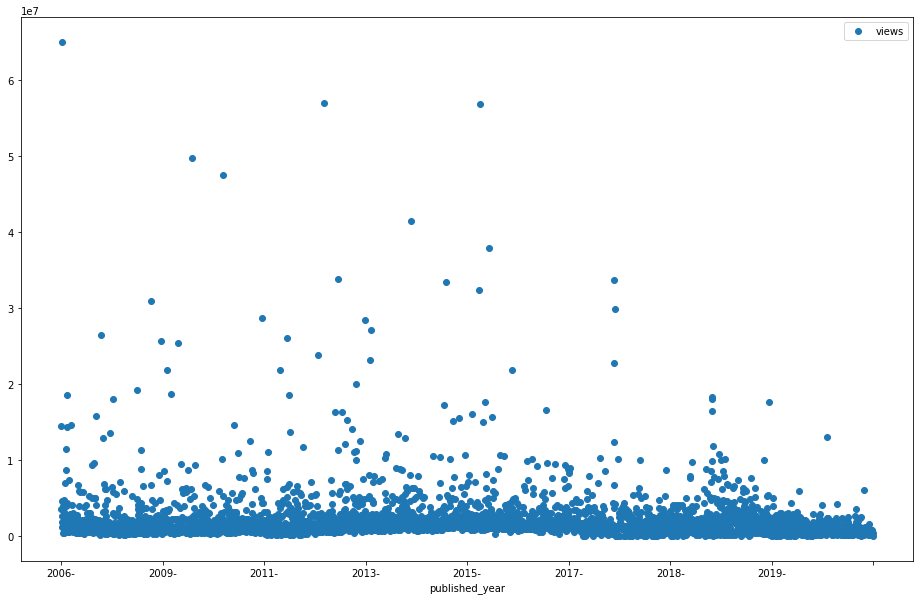

In [ ]:
Ted_talks.plot(x='published_year', y = 'views', style = 'o', figsize = (16,10))

In [ ]:
# Changing the "Date" column into three "year","month","day" column
from datetime import datetime
import datetime as dt
Ted_talks['published_date'] = Ted_talks['published_date'].apply(lambda x: dt.datetime.strptime(x,"%Y-%m-%d"))

In [ ]:
Ted_talks['year'] = Ted_talks['published_date'].dt.year
Ted_talks['month'] = Ted_talks['published_date'].dt.month
Ted_talks['day'] = Ted_talks["published_date"].dt.day_name()

daydict = {'Sunday' : 0, 'Monday' : 1, 'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}
Ted_talks['daynum'] = Ted_talks['day'].map(daydict)

In [ ]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
Ted_talks['weekdays_weekend']=Ted_talks['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
Ted_talks=Ted_talks.drop(columns=['published_date','day'],axis=1)

In [ ]:
Ted_talks

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,event,native_lang,...,duration,topics,related_talks,url,description,transcript,year,month,daynum,weekdays_weekend
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,TED2006,en,...,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",2006,6,2,0
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,TED2006,en,...,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",2006,6,2,0
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,TED2006,en,...,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",2006,6,2,0
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,TED2006,en,...,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,2006,6,2,0
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,TED2006,en,...,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,2006,6,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: 'Nancy Lublin'},{0: ['health activist']},"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,2020-04-22,TED2020: The Prequel,en,...,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B...",2020,4,1,0
4001,62782,The dark history of IQ tests,Stefan C Dombrowski,{0: 'Stefan C Dombrowski'},NaN,NaN,307187,2020-04-27,TED-Ed,en,...,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo...",2020,4,1,0
4002,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II'},{0: ['law researcher']},{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06-22,TEDxMileHigh,en,...,774,"['society', 'law', 'policy', 'justice system',...","{2406: 'I love being a police officer, but we ...",https://www.ted.com/talks/dick_m_carpenter_ii_...,"Many countries have an active, centuries-old l...",Picture yourself driving down the road tomorro...,2020,4,2,0
4003,62784,The electrifying speeches of Sojourner Truth,Daina

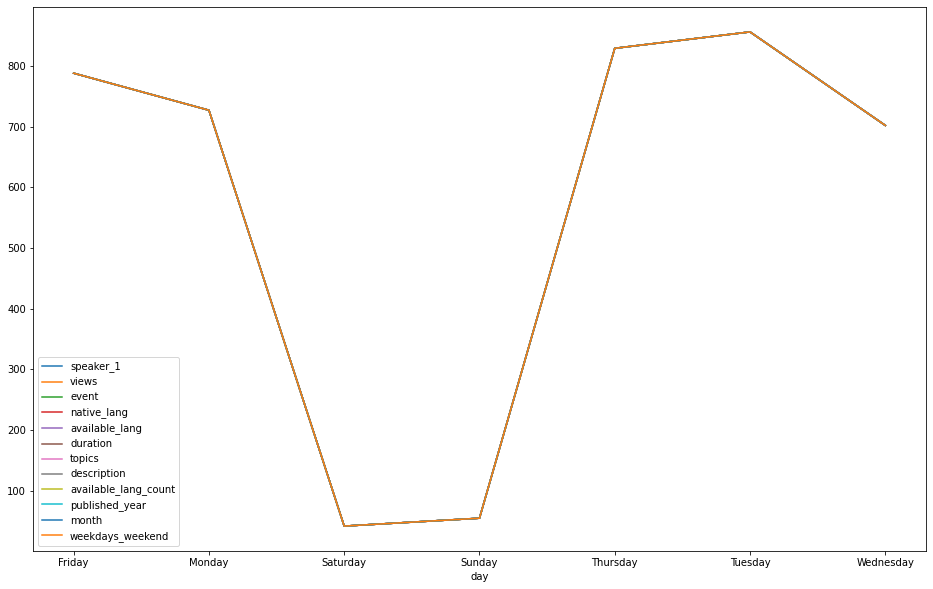

In [ ]:
Ted_talks.groupby(["day"]).count().plot(figsize = (16,10))


title

speaker_1

**views

//published_date

event

available_lang

//comments

Duration

topics

//related_talks

//description


event

weekday-weekend (publish date)

no. of lang (available lang)

views

speaker 1

duration

comments

topics?

In [ ]:
Ted_talks.drop(labels = ["talk_id"], axis = 1, inplace = True)

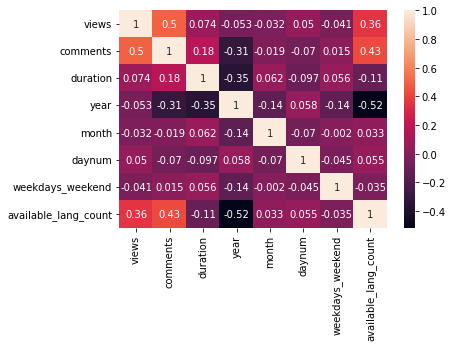

In [ ]:

correlmap = Ted_talks.corr()
sns.heatmap(correlmap, annot=True)


In [ ]:
sns.distplot?

Object `sns.distplot` not found.
